# Customer Segmentacion: Unsupervised Machine Learning

The aim of the project is to perform customer segmentation analysis using a dataset from a retail store. 

Customer segmentation is a common technique to group customers in different segments based on similar characteristics. In order to do this will use a dataset of 2240 rows and 29 columns from the website kaggle (source: https://www.kaggle.com/imakash3011/customer-personality-analysis). 
The variables and their description are provided below:

**ID**: Customer's unique identifier <br>
**Year_Birth**: Customer's birth year <br>
**Education**: Customer's education level <br>
**Marital_Status**: Customer's marital status <br>
**Income**: Customer's yearly household income<br>
**Kidhome**: Number of children in customer's household <br>
**Teenhome**: Number of teenagers in customer's household <br>
**Dt_Customer**: Date of customer's enrollment with the company <br>
**Recency**: Number of days since customer's last purchase<br>
**Complain**: 1 if the customer complained in the last 2 years, 0 otherwise<br>

**MntWines**: Amount spent on wine in last 2 years<br>
**MntFruits**: Amount spent on fruits in last 2 years <br>
**MntMeatProducts**: Amount spent on meat in last 2 years <br>
**MntFishProducts**: Amount spent on fish in last 2 years<br>
**MntSweetProducts**: Amount spent on sweets in last 2 years <br>
**MntGoldProds**: Amount spent on gold in last 2 years<br>

**NumDealsPurchases**: Number of purchases made with a discount <br>
**AcceptedCmp1**: 1 if customer accepted the offer in the 1st campaign, 0 otherwise <br>
**AcceptedCmp2**: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise <br>
**AcceptedCmp3**: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise <br>
**AcceptedCmp4**: 1 if customer accepted the offer in the 4th campaign, 0 otherwise <br>
**AcceptedCmp5**: 1 if customer accepted the offer in the 5th campaign, 0 otherwise <br>
**Response**: 1 if customer accepted the offer in the last campaign, 0 otherwise <br>

**NumWebPurchases**: Number of purchases made through the company’s website <br>
**NumCatalogPurchases**: Number of purchases made using a catalogue <br>
**NumStorePurchases**: Number of purchases made directly in stores <br>
**NumWebVisitsMonth**: Number of visits to company’s website in the last month <br>


## Importing libraries


In [149]:
#Importing the Libraries
import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
import warnings
import sys
from datetime import datetime
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(42)
#import plotly.express as px
from matplotlib import pyplot
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from yellowbrick.cluster import KElbowVisualizer

## Loading marketing campaign dataset

In [150]:
df=pd.read_csv("Data/marketing_campaign.csv",sep="\t")
print("number of datapoints:",len(df))

number of datapoints: 2240


In [151]:
df


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


## Important Functions

#### Data Cleaning Function

In [152]:
# With this funtion we will standarize the columns name, 
# we will remove the missing values and duplicates and drop some columns

def clean_data(df):
    df.columns=[e.lower().replace(' ', '_') for e in df.columns]
    df = df.drop(columns = ['z_costcontact', 'z_revenue'])
    df=df.dropna()
    df.drop_duplicates()
    
    return df

#### Removing outlier function

In [153]:

def outliers_removal(column):
    percentile25 = X[column].quantile(0.25)
    percentile75 = X[column].quantile(0.75)
    iqr = percentile75 - percentile25
    upper_limit = percentile75 + 1.5 * iqr
    lower_limit = percentile25 - 1.5 * iqr
    X[X[column] > upper_limit]

    X[X[column] < lower_limit]
    new_X = X[X[column] < upper_limit]
    new_X.shape
    new_X_cap = X.copy()
    new_X_cap[column] = np.where(
        new_X_cap[column] > upper_limit,
        upper_limit,
        np.where(
            new_X_cap[column] < lower_limit,
            lower_limit,
            new_X_cap[column]
        )
    )
    plt.figure(figsize=(8,8))

    plt.subplot(2,2,1)
    sns.boxplot(X[column],palette="hls")

    plt.subplot(2,2,2)
    sns.boxplot(new_X_cap[column],palette="hls")

    plt.show()

## Cleaning Data

In [154]:
#let's call our clean data function
df=clean_data(df)

In [155]:
#after the cleaning process our data set has 2216 rows and 27 columns
df

,id,year_birth,education,marital_status,income,kidhome,teenhome,dt_customer,recency,mntwines,...,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,3,6,5,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,3,4,5,0,0,0,0,0,0,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,2,5,7,0,0,0,1,0,0,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,3,13,6,0,1,0,0,0,0,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,5,10,3,0,0,0,0,0,0,0


## Exploratory Data Analysis(EDA)

It is time to understand our data

In [156]:

df.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   2216 non-null   int64  
 1   year_birth           2216 non-null   int64  
 2   education            2216 non-null   object 
 3   marital_status       2216 non-null   object 
 4   income               2216 non-null   float64
 5   kidhome              2216 non-null   int64  
 6   teenhome             2216 non-null   int64  
 7   dt_customer          2216 non-null   object 
 8   recency              2216 non-null   int64  
 9   mntwines             2216 non-null   int64  
 10  mntfruits            2216 non-null   int64  
 11  mntmeatproducts      2216 non-null   int64  
 12  mntfishproducts      2216 non-null   int64  
 13  mntsweetproducts     2216 non-null   int64  
 14  mntgoldprods         2216 non-null   int64  
 15  numdealspurchases    2216 non-null   i

### Data type

In [157]:
#It is neccesary to change the data type of dt_customer. 
#It should be datetime

df["dt_customer"] = pd.to_datetime(df["dt_customer"])


In [158]:
#We will convert some variable into categorical
list= df[["id"]]

df[["id"]]=list.astype(str)

In [159]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   id                   2216 non-null   object        
 1   year_birth           2216 non-null   int64         
 2   education            2216 non-null   object        
 3   marital_status       2216 non-null   object        
 4   income               2216 non-null   float64       
 5   kidhome              2216 non-null   int64         
 6   teenhome             2216 non-null   int64         
 7   dt_customer          2216 non-null   datetime64[ns]
 8   recency              2216 non-null   int64         
 9   mntwines             2216 non-null   int64         
 10  mntfruits            2216 non-null   int64         
 11  mntmeatproducts      2216 non-null   int64         
 12  mntfishproducts      2216 non-null   int64         
 13  mntsweetproducts     2216 non-nul

### Creating new features

In [160]:
#calculate total spent using amount spent on different items:

df["total_spent"] = df["mntwines"]+ df["mntfruits"]+ df["mntmeatproducts"]+ df["mntfishproducts"]+ df["mntsweetproducts"]+ df["mntgoldprods"]

<AxesSubplot:xlabel='marital_status', ylabel='count'>

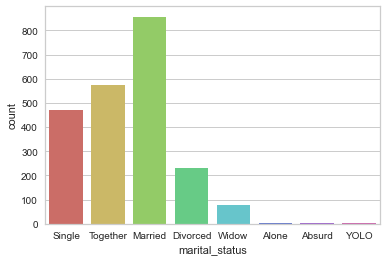

In [161]:
# We check column: "marital_status". 
#We can see 8 different classes
#We need to clean the "marital_status" values

sns.countplot(x='marital_status', data=df,palette="hls" )

In [162]:
df['marital_status'].value_counts()

Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: marital_status, dtype: int64

In [163]:
df['marital_status']=df['marital_status'].replace({"Married": 'relationship', "Together": 'relationship', "Single": 'single', "Alone": 'single', "Divorced": 'single', "Widow": 'single', 'Absurd': "single", "YOLO": "single" })

In [164]:
#df['marital_status']=df['marital_status'].replace({"Married": 1, "Together": 1, "Single": 0, "Alone": 0, "Divorced": 0, "Widow": 0, 'Absurd': 0, "YOLO": 0 })

In [165]:
df['marital_status'].value_counts()

relationship    1430
single           786
Name: marital_status, dtype: int64

<AxesSubplot:xlabel='marital_status', ylabel='count'>

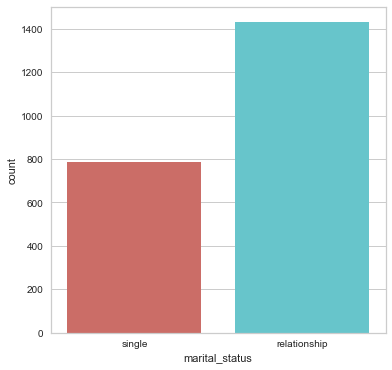

In [166]:
fig,ax=plt.subplots(figsize=(6,6))
sns.countplot(x='marital_status', data=df,palette="hls" )




0.64% of the customers are in relationship<br>
0.35% of the customers are single

Text(0.5, 1.0, 'Total spent by marital status')

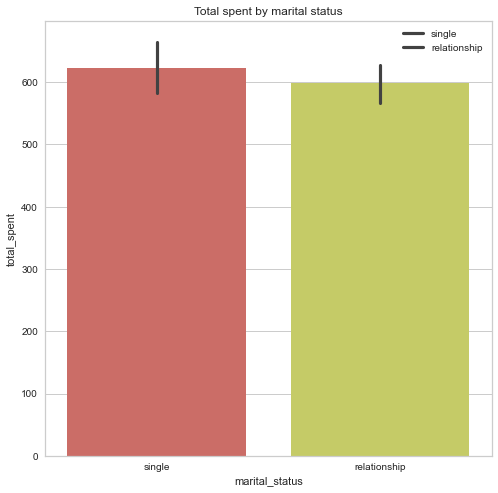

In [167]:
sns.set_palette("hls")
fig,ax=plt.subplots(figsize=(8,8))
sns.barplot(x=df["marital_status"],y=df["total_spent"])
plt.legend(labels=['single', 'relationship'])
ax.set_title("Total spent by marital status")


According to our chart, single customers spent more than customer in relationship

In [168]:
#calculate customer age using year of birth
df["age"] = 2021-df["year_birth"]

In [169]:
# we will have to deal with outliers in Age column
df["age"].max()

128

In [170]:
# We will calculate since when a customer is enrolled in the company's database
# First we nees to know the latest date registered in our data base:

df["dt_customer"].max()

Timestamp('2014-12-06 00:00:00')

In [171]:
#We calculate the number of days between 2 dates: 
df['last_date'] = '2014-12-06'
df['last_date'] = pd.to_datetime(df['last_date'])
df['regist_days'] = df['last_date'] - df['dt_customer']
df['regist_days'] = df['regist_days'].dt.days
df.head()

,id,year_birth,education,marital_status,income,kidhome,teenhome,dt_customer,recency,mntwines,...,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,response,total_spent,age,last_date,regist_days
0,5524,1957,Graduation,single,58138.0,0,0,2012-04-09,58,635,...,0,0,0,0,0,1,1617,64,2014-12-06,971
1,2174,1954,Graduation,single,46344.0,1,1,2014-08-03,38,11,...,0,0,0,0,0,0,27,67,2014-12-06,125
2,4141,1965,Graduation,relationship,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,0,776,56,2014-12-06,472
3,6182,1984,Graduation,relationship,26646.0,1,0,2014-10-02,26,11,...,0,0,0,0,0,0,53,37,2014-12-06,65
4,5324,1981,PhD,relationship,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,0,422,40,2014-12-06,321


In [172]:
# calculate the total number of purchases.

df["total_number_purchase"] = df["numwebpurchases"]+ df["numstorepurchases"]

<AxesSubplot:xlabel='education', ylabel='count'>

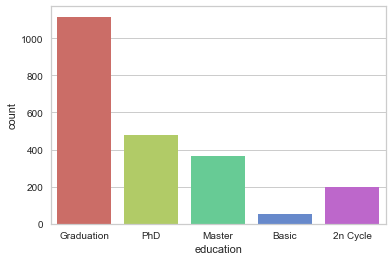

In [173]:
# We check column: "education". 
#We can see 5 different classes

sns.countplot(x='education', data=df,palette="hls" )

In [174]:
#We will reduce the number of options:
df['education']=df['education'].replace({"Basic": 'basic_studies', "Graduation": 'graduate', "Master": 'master', "2n Cycle": 'master', "PhD": 'postgrad' })

In [175]:
df['education'].value_counts()

graduate         1116
master            565
postgrad          481
basic_studies      54
Name: education, dtype: int64

50% of the customer are graduate<br>
97.56% of the customers have university studies <br>
0.024% of the custmers have basic studies


In [176]:
df['kidhome'].value_counts()

0    1283
1     887
2      46
Name: kidhome, dtype: int64

In [177]:
df['teenhome'].value_counts()

0    1147
1    1018
2      51
Name: teenhome, dtype: int64

In [178]:
#" kidhome" and "teenhome" are very similar columns. 
#in this case we will sum them up in order to have a new column called "parent"

df["number_children"]=df['kidhome']+df['teenhome']

In [179]:
df['number_children'].value_counts()

1    1117
0     633
2     416
3      50
Name: number_children, dtype: int64

<AxesSubplot:xlabel='number_children', ylabel='count'>

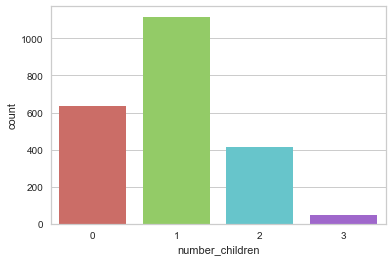

In [180]:

sns.countplot(x='number_children', data=df,palette="hls" )

29,56% of the customers do not have children <br>
50.41% of the customers have 1 child<br>
18.77% of the customers have 2 children <br>
2.25% of the customers have 3 children






In [181]:
# parent will have 2 values: "1": when customer is parent, "0" when the customer is not parent
df["parent"] = np.where(df.number_children >0, '1', '0')


In [182]:
#Creating a feature to get a sum of accepted promotions 
df["total_promos"] =  df["acceptedcmp1"]+ df["acceptedcmp2"]+ df["acceptedcmp3"]+ df["acceptedcmp4"]+ df["acceptedcmp5"]

In [183]:
df

,id,year_birth,education,marital_status,income,kidhome,teenhome,dt_customer,recency,mntwines,...,complain,response,total_spent,age,last_date,regist_days,total_number_purchase,number_children,parent,total_promos
0,5524,1957,graduate,single,58138.0,0,0,2012-04-09,58,635,...,0,1,1617,64,2014-12-06,971,12,0,0,0
1,2174,1954,graduate,single,46344.0,1,1,2014-08-03,38,11,...,0,0,27,67,2014-12-06,125,3,2,1,0
2,4141,1965,graduate,relationship,71613.0,0,0,2013-08-21,26,426,...,0,0,776,56,2014-12-06,472,18,0,0,0
3,6182,1984,graduate,relationship,26646.0,1,0,2014-10-02,26,11,...,0,0,53,37,2014-12-06,65,6,1,1,0
4,5324,1981,postgrad,relationship,58293.0,1,0,2014-01-19,94,173,...,0,0,422,40,2014-12-06,321,11,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,graduate,relationship,61223.0,0,1,2013-06-13,46,709,...,0,0,1341,54,2014-12-06,541,13,1,1,0
2236,4001,1946,postgrad,relationship,64014.0,2,1,2014-10-06,56,406,...,0,0,444,75,2014-12-06,61,13,3,1,1
2237,7270,1981,graduate,single,56981.0,0,0,2014-01-25,91,908,...,0,0,1241,40,2014-12-06,315,15,0,0,1
2238,8235,1956,master,relationship,69245.0,0,1,2014-01-24,8,428,...,0,0,843,65,2014-12-06,316,16,1,1,0


In [184]:
#we will drop the columns that we do not need anymore:
df.drop(columns=['year_birth', 'kidhome',"teenhome","dt_customer","last_date","acceptedcmp1","acceptedcmp2","acceptedcmp3","acceptedcmp4","acceptedcmp5"],inplace=True)

In [185]:
df

,id,education,marital_status,income,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,...,numwebvisitsmonth,complain,response,total_spent,age,regist_days,total_number_purchase,number_children,parent,total_promos
0,5524,graduate,single,58138.0,58,635,88,546,172,88,...,7,0,1,1617,64,971,12,0,0,0
1,2174,graduate,single,46344.0,38,11,1,6,2,1,...,5,0,0,27,67,125,3,2,1,0
2,4141,graduate,relationship,71613.0,26,426,49,127,111,21,...,4,0,0,776,56,472,18,0,0,0
3,6182,graduate,relationship,26646.0,26,11,4,20,10,3,...,6,0,0,53,37,65,6,1,1,0
4,5324,postgrad,relationship,58293.0,94,173,43,118,46,27,...,5,0,0,422,40,321,11,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,graduate,relationship,61223.0,46,709,43,182,42,118,...,5,0,0,1341,54,541,13,1,1,0
2236,4001,postgrad,relationship,64014.0,56,406,0,30,0,0,...,7,0,0,444,75,61,13,3,1,1
2237,7270,graduate,single,56981.0,91,908,48,217,32,12,...,6,0,0,1241,40,315,15,0,0,1
2238,8235,master,relationship,69245.0,8,428,30,214,80,30,...,3,0,0,843,65,316,16,1,1,0


In [186]:
#We confirm the new columns have the correct data type
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     2216 non-null   object 
 1   education              2216 non-null   object 
 2   marital_status         2216 non-null   object 
 3   income                 2216 non-null   float64
 4   recency                2216 non-null   int64  
 5   mntwines               2216 non-null   int64  
 6   mntfruits              2216 non-null   int64  
 7   mntmeatproducts        2216 non-null   int64  
 8   mntfishproducts        2216 non-null   int64  
 9   mntsweetproducts       2216 non-null   int64  
 10  mntgoldprods           2216 non-null   int64  
 11  numdealspurchases      2216 non-null   int64  
 12  numwebpurchases        2216 non-null   int64  
 13  numcatalogpurchases    2216 non-null   int64  
 14  numstorepurchases      2216 non-null   int64  
 15  numw

## Correlation Matrix


In [187]:
#pallet = ["#A066CB", "#86C7ED", "#1836B2", "#000080"]
#cmap = colors.ListedColormap(["#A066CB","#86C7ED",'#1836B2'])

In [188]:

#sns.pairplot(df)


In [189]:
#check the correlation matrix
df.corr()

,income,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods,numdealspurchases,numwebpurchases,...,numstorepurchases,numwebvisitsmonth,complain,response,total_spent,age,regist_days,total_number_purchase,number_children,total_promos
income,1.000000,-0.003970,0.578650,0.430842,0.584633,0.438871,0.440744,0.325916,-0.083101,0.387878,...,0.529362,-0.553088,-0.027225,0.133047,0.667576,0.161791,-0.016712,0.533023,-0.293352,0.308381
recency,-0.003970,1.000000,0.015721,-0.005844,0.022518,0.000551,0.025110,0.017663,0.002115,-0.005641,...,-0.000434,-0.018564,0.013637,-0.199766,0.020066,0.016295,0.030777,-0.003230,0.018290,-0.013647
mntwines,0.578650,0.015721,1.000000,0.387024,0.568860,0.397721,0.390326,0.392731,0.008886,0.553786,...,0.640012,-0.321978,-0.039470,0.246299,0.893136,0.159451,0.148720,0.688956,-0.353748,0.510833
mntfruits,0.430842,-0.005844,0.387024,1.000000,0.547822,0.593431,0.571606,0.396487,-0.134512,0.302039,...,0.458491,-0.418729,-0.005324,0.122443,0.613249,0.017747,0.059609,0.443867,-0.395901,0.157090
mntmeatproducts,0.584633,0.022518,0.568860,0.547822,1.000000,0.573574,0.535136,0.359446,-0.121308,0.307090,...,0.486006,-0.539484,-0.023782,0.237746,0.845884,0.033697,0.071345,0.463642,-0.504545,0.307190
mntfishproducts,0.438871,0.000551,0.397721,0.593431,0.573574,1.000000,0.583867,0.427142,-0.143241,0.299688,...,0.457745,-0.446423,-0.021220,0.108145,0.642371,0.040425,0.078033,0.442168,-0.427841,0.176111
mntsweetproducts,0.440744,0.025110,0.390326,0.571606,0.535136,0.583867,1.000000,0.357450,-0.121432,0.333937,...,0.455225,-0.422371,-0.022641,0.116170,0.607062,0.020204,0.076423,0.458574,-0.389411,0.201485
mntgoldprods,0.325916,0.017663,0.392731,0.396487,0.359446,0.427142,0.357450,1.000000,0.051905,0.407066,...,0.389180,-0.247691,-0.031133,0.140332,0.528708,0.064208,0.144956,0.455844,-0.268918,0.196822
numdealspurchases,-0.083101,0.002115,0.008886,-0.134512,-0.121308,-0.143241,-0.121432,0.051905,1.000000,0.241440,...,0.066107,0.346048,0.000497,0.003451,-0.065854,0.058668,0.200666,0.167848,0.436076,-0.125727
numwebpurchases,0.387878,-0.005641,0.553786,0.302039,0.307090,0.299688,0.333937,0.407066,0.241440,1.000000,...,0.516240,-0.051226,-0.016642,0.151431,0.528973,0.153051,0.172335,0.846086,-0.148871,0.196823


<AxesSubplot:>

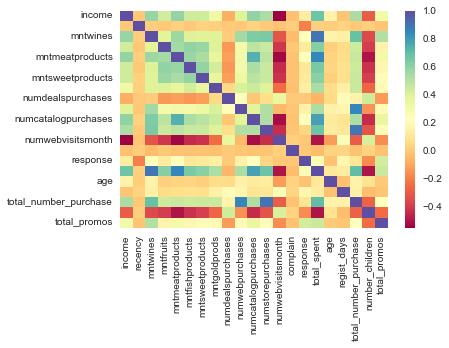

In [190]:
sns.heatmap(df.corr(),cmap ="Spectral")

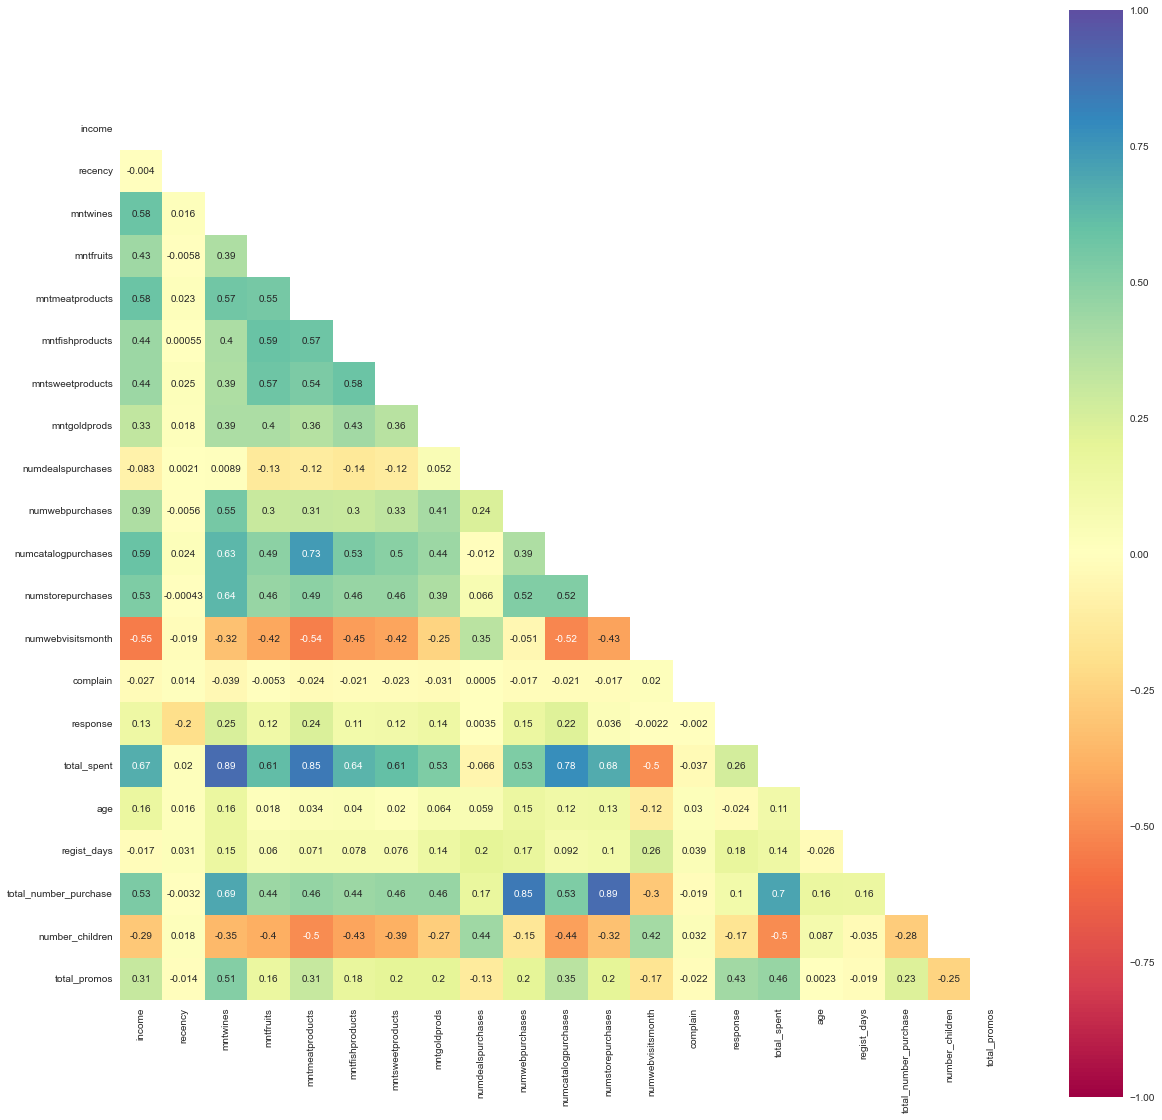

In [191]:
#Heatmap
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(20, 20))
    ax = sns.heatmap(corr, mask=mask,cmap = "Spectral", vmin=-1,vmax=1,annot=True, square=True)

In [192]:
#a few columns are highly correlated with each other (<0,8). Usually we will drop those columns, but they can be important to understand customer behaviour
#df = df.drop(columns = ['mntwines', 'mntmeatproducts', 'numwebpurchases','numstorepurchases'])

## Checking Outliers

In [193]:
X=df._get_numeric_data()
X.head()

,income,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods,numdealspurchases,numwebpurchases,...,numstorepurchases,numwebvisitsmonth,complain,response,total_spent,age,regist_days,total_number_purchase,number_children,total_promos
0,58138.0,58,635,88,546,172,88,88,3,8,...,4,7,0,1,1617,64,971,12,0,0
1,46344.0,38,11,1,6,2,1,6,2,1,...,2,5,0,0,27,67,125,3,2,0
2,71613.0,26,426,49,127,111,21,42,1,8,...,10,4,0,0,776,56,472,18,0,0
3,26646.0,26,11,4,20,10,3,5,2,2,...,4,6,0,0,53,37,65,6,1,0
4,58293.0,94,173,43,118,46,27,15,5,5,...,6,5,0,0,422,40,321,11,1,0


<AxesSubplot:>

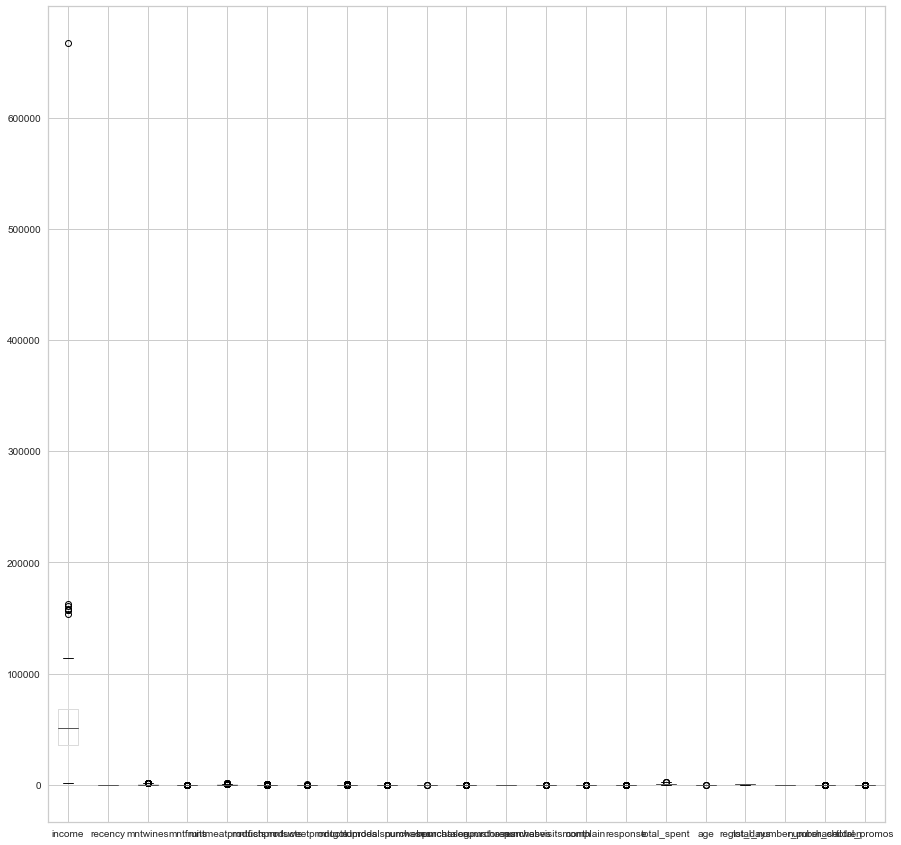

In [194]:
#Boxplot to detect outliers

X.boxplot(figsize=(15,15))

#### Removing the outliers from Income

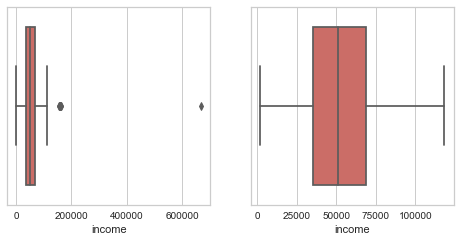

In [195]:
#we can see we have outliers in a few columns but since we have a small dataset only 2216, we will handle only outliers from "income" and "age"
outliers_removal("income")

In [196]:
df=df[df["income"]<600000]

#### Removing the outliers from Age

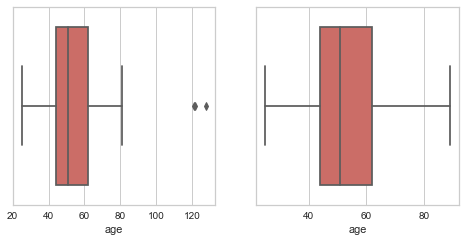

In [197]:
#we have a customer in dataset 128 years old, we remove these outlier from the age column 
outliers_removal("age")

In [198]:
df=df[df["age"]<100]

In [199]:
df["age"].max()

81

## RFM Analysis

RFM analysis is a marketing technique used to quantitatively rank and group customers based on the **recency**, **frequency** and **monetary** total of their recent transactions to identify the best customers and perform targeted marketing campaigns.<br>

The system assigns each customer numerical scores based on these factors to provide an objective analysis.<br>

What does it mean recency, freqency and monetary? <br>
**Recency**: Number of days since the customer's last purchase. Customers who recently made a purchase have higher probability to buy or use the same product again.<br>
**Frequency**. Number of total purchases made by the customer in the store.<br>
**Monetary**. Total spent of the customer in the store <br>

In [200]:
# In order to make the RFM analysis we will extract from our dataset the columns:
#"id","recency","total_purchase" and "total_spent"

rfm_df = df.filter(['id','recency','total_number_purchase','total_spent'], axis=1)

In [201]:
rfm_df

,id,recency,total_number_purchase,total_spent
0,5524,58,12,1617
1,2174,38,3,27
2,4141,26,18,776
3,6182,26,6,53
4,5324,94,11,422
...,...,...,...,...
2235,10870,46,13,1341
2236,4001,56,13,444
2237,7270,91,15,1241
2238,8235,8,16,843


In [202]:
# We rename the columns "total_spent" and "total_purchase" to keep the nomenclature of the RFM analysis.

rfm_df.columns = ['id', 'recency','frequency','monetary']

In [203]:
rfm_df

,id,recency,frequency,monetary
0,5524,58,12,1617
1,2174,38,3,27
2,4141,26,18,776
3,6182,26,6,53
4,5324,94,11,422
...,...,...,...,...
2235,10870,46,13,1341
2236,4001,56,13,444
2237,7270,91,15,1241
2238,8235,8,16,843


In the RFM Analysis, we normally group customers into four groups based on the distribution of **recency**, **frequency**, and the **monetary** values.<br>

In order to create the customers segments, we will use **quartiles**. We will assign a score from 1 to 4 to **recency**, **frequency** and **monetary**. <br>

4 is the best/highest value, and 1 is the lowest/worst value. A final RFM score is calculated simply by combining individual RFM score numbers.

In [204]:
#First we need the quartiles:
quantiles = rfm_df.quantile(q=[0.25,0.5,0.75])
quantiles

,recency,frequency,monetary
0.25,24.0,5.0,69.0
0.50,49.0,10.0,397.0
0.75,74.0,14.0,1048.0


In [205]:
quantiles.to_dict()

{'recency': {0.25: 24.0, 0.5: 49.0, 0.75: 74.0},
 'frequency': {0.25: 5.0, 0.5: 10.0, 0.75: 14.0},
 'monetary': {0.25: 69.0, 0.5: 397.0, 0.75: 1048.0}}

In [206]:
# Arguments (x = value, p = recency, monetary_value, frequency, d = quartiles dict)
def rscore(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1
# Arguments (x = value, p = recency, monetary_value, frequency, k = quartiles dict)
def fmscore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4

In [207]:
#create rfm segmentation table

rfm_df['r_quartile'] = rfm_df['recency'].apply(rscore, args=('recency',quantiles,))
rfm_df['f_quartile'] = rfm_df['frequency'].apply(fmscore, args=('frequency',quantiles,))
rfm_df['m_quartile'] = rfm_df['monetary'].apply(fmscore, args=('monetary',quantiles,))

In [208]:
rfm_df['rfmscore'] = rfm_df.r_quartile.map(str) \
                            + rfm_df.f_quartile.map(str) \
                            + rfm_df.m_quartile.map(str)
rfm_df.head()

,id,recency,frequency,monetary,r_quartile,f_quartile,m_quartile,rfmscore
0,5524,58,12,1617,2,3,4,234
1,2174,38,3,27,3,1,1,311
2,4141,26,18,776,3,4,3,343
3,6182,26,6,53,3,2,1,321
4,5324,94,11,422,1,3,3,133


In [209]:
rfm_df['rfm_total_score'] = rfm_df['r_quartile'] + rfm_df['f_quartile'] +rfm_df['m_quartile']

**Highest Recency score** = 4: most recently purchase. <br>
**Highest Frequency score** = 4: most quantity purchase.<br>
**Highest Monetary score** = 4: spent the most.<br>

In [210]:
#We can sort the dataframe based on "rfmscore" and see our most important customers

rfm_df.sort_values('rfmscore',ascending=False)

,id,recency,frequency,monetary,r_quartile,f_quartile,m_quartile,rfmscore,rfm_total_score
2128,1631,3,15,1282,4,4,4,444,12
1672,3690,20,17,2091,4,4,4,444,12
67,9369,19,21,1274,4,4,4,444,12
336,7381,10,17,1442,4,4,4,444,12
209,380,17,20,1804,4,4,4,444,12
...,...,...,...,...,...,...,...,...,...
1435,922,79,3,48,1,1,1,111,3
206,5176,88,4,53,1,1,1,111,3
1433,274,75,5,34,1,1,1,111,3
806,7326,83,4,63,1,1,1,111,3


In [211]:
rfm_df.to_csv("rfm_analysis.csv")

In [212]:
#We create labels
print("stars: ",len(rfm_df[rfm_df['rfmscore']=='444']))
print('loyals: ',len(rfm_df[rfm_df['f_quartile']==4]))#Customers who buy the most often
print("big_spenders: ",len(rfm_df[rfm_df['m_quartile']==4]))#Customers who have generated the most revenue
print('rookies: ', len(rfm_df[rfm_df['rfmscore']=='411']))# First time buyers on the store
print('at_risk: ',len(rfm_df[rfm_df['rfmscore']=='144']))#good past customers who haven't bought recently
print('lost: ',len(rfm_df[rfm_df['rfmscore']=='111']))

stars:  47
loyals:  496
big_spenders:  552
rookies:  128
at_risk:  62
lost:  130


**RFM ananlysys limitations**:

This technique does not include many factors that can be very important to fully understand our customers. For example it does not considerer factors such us age, education, marital status or behaviour in previos marketing campaings.





## Clustering

In [213]:
df

,id,education,marital_status,income,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,...,numwebvisitsmonth,complain,response,total_spent,age,regist_days,total_number_purchase,number_children,parent,total_promos
0,5524,graduate,single,58138.0,58,635,88,546,172,88,...,7,0,1,1617,64,971,12,0,0,0
1,2174,graduate,single,46344.0,38,11,1,6,2,1,...,5,0,0,27,67,125,3,2,1,0
2,4141,graduate,relationship,71613.0,26,426,49,127,111,21,...,4,0,0,776,56,472,18,0,0,0
3,6182,graduate,relationship,26646.0,26,11,4,20,10,3,...,6,0,0,53,37,65,6,1,1,0
4,5324,postgrad,relationship,58293.0,94,173,43,118,46,27,...,5,0,0,422,40,321,11,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,graduate,relationship,61223.0,46,709,43,182,42,118,...,5,0,0,1341,54,541,13,1,1,0
2236,4001,postgrad,relationship,64014.0,56,406,0,30,0,0,...,7,0,0,444,75,61,13,3,1,1
2237,7270,graduate,single,56981.0,91,908,48,217,32,12,...,6,0,0,1241,40,315,15,0,0,1
2238,8235,master,relationship,69245.0,8,428,30,214,80,30,...,3,0,0,843,65,316,16,1,1,0


In [214]:
#We do not need "id " anymore, so we drop it form the model. 
df = df.drop(columns = ['id','response','complain'])

In [215]:
df

,education,marital_status,income,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods,...,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,total_spent,age,regist_days,total_number_purchase,number_children,parent,total_promos
0,graduate,single,58138.0,58,635,88,546,172,88,88,...,10,4,7,1617,64,971,12,0,0,0
1,graduate,single,46344.0,38,11,1,6,2,1,6,...,1,2,5,27,67,125,3,2,1,0
2,graduate,relationship,71613.0,26,426,49,127,111,21,42,...,2,10,4,776,56,472,18,0,0,0
3,graduate,relationship,26646.0,26,11,4,20,10,3,5,...,0,4,6,53,37,65,6,1,1,0
4,postgrad,relationship,58293.0,94,173,43,118,46,27,15,...,3,6,5,422,40,321,11,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,graduate,relationship,61223.0,46,709,43,182,42,118,247,...,3,4,5,1341,54,541,13,1,1,0
2236,postgrad,relationship,64014.0,56,406,0,30,0,0,8,...,2,5,7,444,75,61,13,3,1,1
2237,graduate,single,56981.0,91,908,48,217,32,12,24,...,3,13,6,1241,40,315,15,0,0,1
2238,master,relationship,69245.0,8,428,30,214,80,30,61,...,5,10,3,843,65,316,16,1,1,0


#### Converting categorical into numerical

The standard k-means algorithm is not  directly applicable to categorical data. We need to convert the categorical data into numerical. 
    

In [216]:
df["parent"] = pd.to_numeric(df["parent"], errors='coerce')

In [217]:
#Do we have categorical columns?
df.select_dtypes('object')

,education,marital_status
0,graduate,single
1,graduate,single
2,graduate,relationship
3,graduate,relationship
4,postgrad,relationship
...,...,...
2235,graduate,relationship
2236,postgrad,relationship
2237,graduate,single
2238,master,relationship


In [218]:
df=pd.get_dummies(df, drop_first=True)

In [219]:
df

,income,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods,numdealspurchases,numwebpurchases,...,age,regist_days,total_number_purchase,number_children,parent,total_promos,education_graduate,education_master,education_postgrad,marital_status_single
0,58138.0,58,635,88,546,172,88,88,3,8,...,64,971,12,0,0,0,1,0,0,1
1,46344.0,38,11,1,6,2,1,6,2,1,...,67,125,3,2,1,0,1,0,0,1
2,71613.0,26,426,49,127,111,21,42,1,8,...,56,472,18,0,0,0,1,0,0,0
3,26646.0,26,11,4,20,10,3,5,2,2,...,37,65,6,1,1,0,1,0,0,0
4,58293.0,94,173,43,118,46,27,15,5,5,...,40,321,11,1,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,61223.0,46,709,43,182,42,118,247,2,9,...,54,541,13,1,1,0,1,0,0,0
2236,64014.0,56,406,0,30,0,0,8,7,8,...,75,61,13,3,1,1,0,0,1,0
2237,56981.0,91,908,48,217,32,12,24,1,2,...,40,315,15,0,0,1,1,0,0,1
2238,69245.0,8,428,30,214,80,30,61,2,6,...,65,316,16,1,1,0,0,1,0,0


#### Scaler
We need to scale our numerical data

In [220]:
X=df._get_numeric_data()

In [221]:
X

,income,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods,numdealspurchases,numwebpurchases,...,age,regist_days,total_number_purchase,number_children,parent,total_promos,education_graduate,education_master,education_postgrad,marital_status_single
0,58138.0,58,635,88,546,172,88,88,3,8,...,64,971,12,0,0,0,1,0,0,1
1,46344.0,38,11,1,6,2,1,6,2,1,...,67,125,3,2,1,0,1,0,0,1
2,71613.0,26,426,49,127,111,21,42,1,8,...,56,472,18,0,0,0,1,0,0,0
3,26646.0,26,11,4,20,10,3,5,2,2,...,37,65,6,1,1,0,1,0,0,0
4,58293.0,94,173,43,118,46,27,15,5,5,...,40,321,11,1,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,61223.0,46,709,43,182,42,118,247,2,9,...,54,541,13,1,1,0,1,0,0,0
2236,64014.0,56,406,0,30,0,0,8,7,8,...,75,61,13,3,1,1,0,0,1,0
2237,56981.0,91,908,48,217,32,12,24,1,2,...,40,315,15,0,0,1,1,0,0,1
2238,69245.0,8,428,30,214,80,30,61,2,6,...,65,316,16,1,1,0,0,1,0,0


There are 2 different scaler methods that we can use: <br>

1: StandarsScaler<br>
scaler = StandardScaler()<br>
scaler.fit(X)<br>
X_scaled = scaler.transform(X)<br>
X_scaled_df = pd.DataFrame(X_scaled, columns = X.columns)<br>
display(X.head())<br>

2: MinMax <br>
from sklearn.preprocessing import MinMaxScaler <br>
scaler = MinMaxScaler()<br>
X_scaled = scaler.fit_transform(X)<br>
X_scaled_df = pd.DataFrame(X_scaled, columns = X.columns)<br>
display(X.head())<br>


In [222]:
#We will use the 2 option: MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns = X.columns)
display(X.head())

,income,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods,numdealspurchases,numwebpurchases,...,age,regist_days,total_number_purchase,number_children,parent,total_promos,education_graduate,education_master,education_postgrad,marital_status_single
0,58138.0,58,635,88,546,172,88,88,3,8,...,64,971,12,0,0,0,1,0,0,1
1,46344.0,38,11,1,6,2,1,6,2,1,...,67,125,3,2,1,0,1,0,0,1
2,71613.0,26,426,49,127,111,21,42,1,8,...,56,472,18,0,0,0,1,0,0,0
3,26646.0,26,11,4,20,10,3,5,2,2,...,37,65,6,1,1,0,1,0,0,0
4,58293.0,94,173,43,118,46,27,15,5,5,...,40,321,11,1,1,0,0,0,1,0


In [223]:
X_scaled_df.describe()

,income,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods,numdealspurchases,numwebpurchases,...,age,regist_days,total_number_purchase,number_children,parent,total_promos,education_graduate,education_master,education_postgrad,marital_status_single
count,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,...,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000
mean,0.312627,0.495146,0.204479,0.132309,0.096829,0.145362,0.103231,0.136841,0.154973,0.151413,...,0.483685,0.481791,0.366469,0.315853,0.714286,0.074593,0.504069,0.254521,0.216998,0.354430
std,0.133987,0.292355,0.225936,0.199719,0.130003,0.211475,0.156836,0.161081,0.128300,0.101562,...,0.208957,0.218769,0.193459,0.249822,0.451856,0.169893,0.500096,0.435690,0.412295,0.478449
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.208528,0.242424,0.016075,0.010050,0.009275,0.011583,0.003817,0.028037,0.066667,0.074074,...,0.339286,0.319849,0.185185,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.308968,0.494949,0.117549,0.040201,0.039420,0.046332,0.030534,0.076324,0.133333,0.148148,...,0.464286,0.482596,0.370370,0.333333,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,0.415499,0.747475,0.338245,0.165829,0.134638,0.193050,0.125954,0.174455,0.200000,0.222222,...,0.660714,0.645343,0.518519,0.333333,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Scaled dataframe

In [224]:

X_scaled_df

,income,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods,numdealspurchases,numwebpurchases,...,age,regist_days,total_number_purchase,number_children,parent,total_promos,education_graduate,education_master,education_postgrad,marital_status_single
0,0.351086,0.585859,0.425318,0.442211,0.316522,0.664093,0.335878,0.274143,0.200000,0.296296,...,0.696429,0.913452,0.444444,0.000000,0.0,0.00,1.0,0.0,0.0,1.0
1,0.277680,0.383838,0.007368,0.005025,0.003478,0.007722,0.003817,0.018692,0.133333,0.037037,...,0.750000,0.117592,0.111111,0.666667,1.0,0.00,1.0,0.0,0.0,1.0
2,0.434956,0.262626,0.285332,0.246231,0.073623,0.428571,0.080153,0.130841,0.066667,0.296296,...,0.553571,0.444026,0.666667,0.000000,0.0,0.00,1.0,0.0,0.0,0.0
3,0.155079,0.262626,0.007368,0.020101,0.011594,0.038610,0.011450,0.015576,0.133333,0.074074,...,0.214286,0.061148,0.222222,0.333333,1.0,0.00,1.0,0.0,0.0,0.0
4,0.352051,0.949495,0.115874,0.216080,0.068406,0.177606,0.103053,0.046729,0.333333,0.185185,...,0.267857,0.301976,0.407407,0.333333,1.0,0.00,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2207,0.370288,0.464646,0.474883,0.216080,0.105507,0.162162,0.450382,0.769470,0.133333,0.333333,...,0.517857,0.508937,0.481481,0.333333,1.0,0.00,1.0,0.0,0.0,0.0
2208,0.387659,0.565657,0.271936,0.000000,0.017391,0.000000,0.000000,0.024922,0.466667,0.296296,...,0.892857,0.057385,0.481481,1.000000,1.0,0.25,0.0,0.0,1.0,0.0
2209,0.343885,0.919192,0.608171,0.241206,0.125797,0.123552,0.045802,0.074766,0.066667,0.074074,...,0.267857,0.296331,0.555556,0.000000,0.0,0.25,1.0,0.0,0.0,1.0
2210,0.420217,0.080808,0.286671,0.150754,0.124058,0.308880,0.114504,0.190031,0.133333,0.222222,...,0.714286,0.297272,0.592593,0.333333,1.0,0.00,0.0,1.0,0.0,0.0


#### Principal Components

**PCA**
Try to get correct number of dimensions: 


In [225]:
#95% of variance
from sklearn.decomposition import PCA
pca = PCA(n_components = 0.95)
pca.fit(X_scaled_df)
reduced = pca.transform(X_scaled_df)


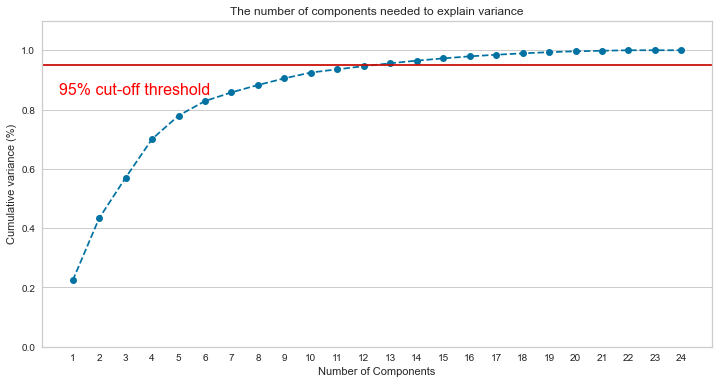

In [226]:
pca = PCA().fit(X_scaled_df)

%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, 25, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(1, 25, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()



According to the chart, 12 dimensions would explain 95% of the variance of the model. 
If we decide to follow, 80% rule, we will use 6 dimensions

In [227]:
#We calculate PCA with 12 dimensions:
pca = PCA(n_components=12)
pca.fit(X_scaled_df)
pca_df = pd.DataFrame(pca.transform(X_scaled_df), columns=[f"col{i}" for i in range(1,13)])
pca_df.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,2212.0,3.648879e-17,0.623876,-1.079517,-0.474926,-0.139269,0.456782,1.664654
col2,2212.0,5.193505e-17,0.604912,-0.912808,-0.605586,0.021499,0.437830,1.346358
col3,2212.0,3.031531e-17,0.487908,-0.801570,-0.270646,-0.143791,0.241884,1.068248
col4,2212.0,7.026728e-18,0.476437,-0.757645,-0.357703,-0.152401,0.516576,0.956719
col5,2212.0,5.254361e-18,0.371018,-1.005858,-0.239501,0.063190,0.210817,1.070562
col6,2212.0,1.695826e-17,0.292410,-0.521609,-0.249452,0.003866,0.253596,0.541129
col7,2212.0,4.623838e-17,0.225726,-0.612780,-0.165400,-0.000506,0.162935,0.723901
col8,2212.0,2.033987e-17,0.208065,-0.669306,-0.140951,0.009710,0.145042,0.694245
col9,2212.0,-2.207145e-17,0.197854,-0.749897,-0.101981,-0.003677,0.088200,0.988779
col10,2212.0,3.599943e-17,0.184999,-0.619017,-0.114735,-0.008040,0.099806,0.772062


In [228]:
pca_df.columns = ['PCA1','PCA2','PCA3','PCA4','PCA5','PCA6','PCA7','PCA8','PCA9','PCA10','PCA11','PCA12']

In [229]:
pca_df 

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,PCA11,PCA12
0,1.244148,-0.050371,0.127578,0.551844,0.039538,0.111611,0.370573,-0.175886,-0.330134,0.417947,0.036744,0.032166
1,-0.265391,-0.821711,0.246086,0.645510,0.103525,-0.118904,-0.452973,-0.193982,-0.042405,0.157691,-0.090178,0.021407
2,0.981019,-0.125338,-0.229394,-0.356099,0.218737,-0.249769,-0.050425,-0.126901,-0.157739,-0.331781,-0.007323,0.015827
3,-0.218066,-0.780911,-0.169131,-0.264257,0.257721,-0.260096,-0.266241,0.279047,0.139756,-0.151576,0.042381,0.000170
4,-0.455902,0.354059,0.610685,-0.605952,-0.035949,0.437235,-0.080598,0.397727,-0.086612,-0.095822,-0.011431,0.042417
...,...,...,...,...,...,...,...,...,...,...,...,...
2207,0.384613,-0.485801,-0.164626,-0.382895,-0.448484,-0.043847,0.032783,0.071848,0.002493,0.288882,0.387882,0.286810
2208,-0.707714,0.275230,0.699590,-0.642056,-0.270601,0.059629,-0.502202,-0.306309,0.068198,0.132660,-0.301540,0.341872
2209,1.137468,-0.068138,0.179433,0.531450,0.044891,0.392085,-0.097073,0.027611,0.403850,-0.435311,-0.161320,-0.063585
2210,-0.295184,0.655552,-0.655694,-0.151333,-0.506843,-0.423255,-0.308405,-0.047732,-0.134274,-0.112440,0.108723,-0.065801


In [230]:
#We need to understand what are the most important coefficients in each PCA
for comp in range(1,len(pca.components_)+1):
    print("Principal component ",comp)
    my_list = [(abs(value),index+1,X.columns[index],value) for index,value in enumerate(pca.components_[comp-1,:]) ]
    my_list.sort(reverse=True)
    my_list = [(elem[1],elem[2],round(elem[3],2)) for elem in my_list]
    print(my_list)
    print()

Principal component  1
[(19, 'parent', -0.54), (21, 'education_graduate', 0.39), (14, 'total_spent', 0.29), (18, 'number_children', -0.28), (22, 'education_master', -0.23), (12, 'numstorepurchases', 0.22), (6, 'mntfishproducts', 0.22), (3, 'mntwines', 0.21), (4, 'mntfruits', 0.2), (17, 'total_number_purchase', 0.16), (7, 'mntsweetproducts', 0.15), (5, 'mntmeatproducts', 0.15), (1, 'income', 0.13), (23, 'education_postgrad', -0.13), (8, 'mntgoldprods', 0.12), (11, 'numcatalogpurchases', 0.11), (13, 'numwebvisitsmonth', -0.1), (20, 'total_promos', 0.1), (24, 'marital_status_single', 0.08), (10, 'numwebpurchases', 0.06), (9, 'numdealspurchases', -0.05), (16, 'regist_days', 0.03), (15, 'age', 0.01), (2, 'recency', 0.01)]

Principal component  2
[(21, 'education_graduate', -0.72), (22, 'education_master', 0.42), (19, 'parent', -0.31), (23, 'education_postgrad', 0.29), (14, 'total_spent', 0.16), (3, 'mntwines', 0.15), (18, 'number_children', -0.15), (12, 'numstorepurchases', 0.13), (17, 'tot

#### K-means
First We need to calculate the number of optimal clusters for our model. 

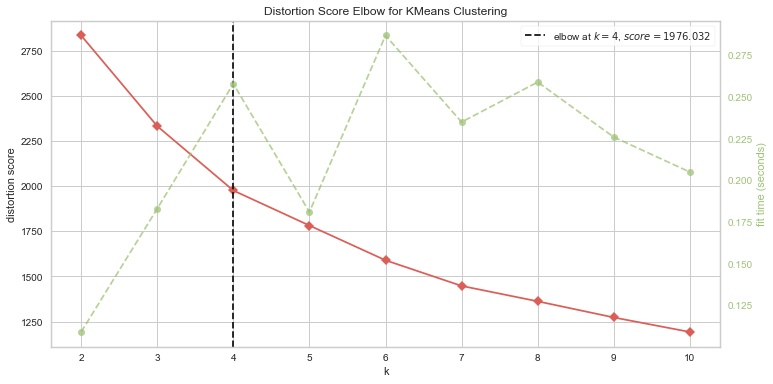

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [231]:
model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, K = range(2, 21))
visualizer.fit(pca_df)        # Fit data to visualizer
visualizer.show()        # Finalize and render figure

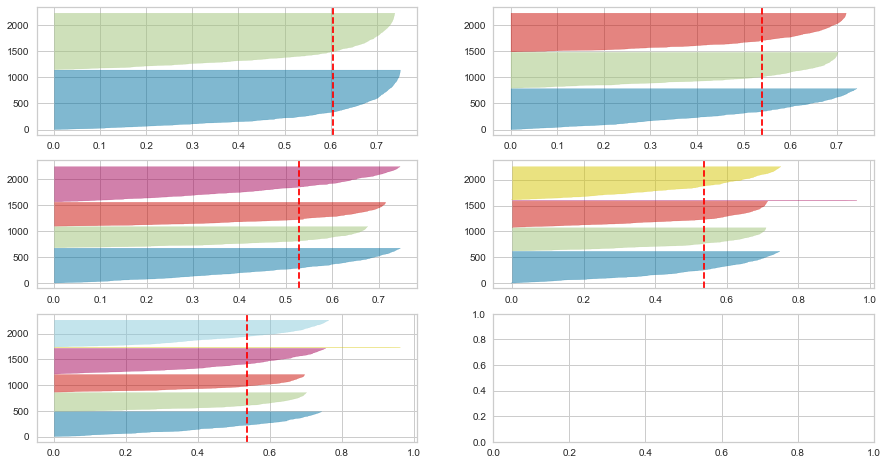

In [232]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(3, 2, figsize=(15,8))
for i in [2, 3, 4, 5,6]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X)

In [233]:
#Our optimal number of clusters are 6
kmeans = KMeans(n_clusters=4, random_state=1234)
kmeans.fit(pca_df)

KMeans(n_clusters=4, random_state=1234)

In [234]:
len(kmeans.labels_)


2212

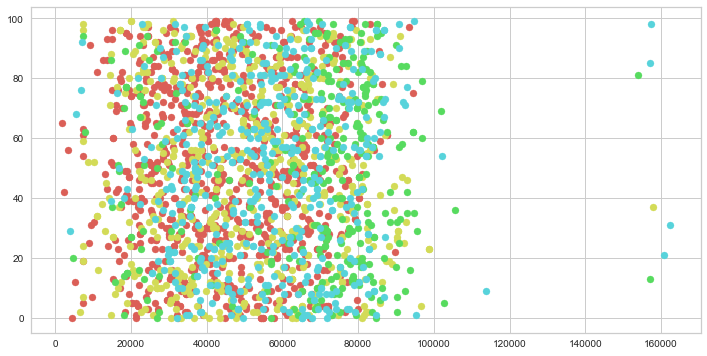

In [235]:
# assign a cluster to each example
labels = kmeans.predict(pca_df)
# retrieve unique clusters
clusters = np.unique(labels)
# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = np.where(labels == cluster)
    # create scatter of these samples
    pyplot.scatter(X.to_numpy()[row_ix, 0], X.to_numpy()[row_ix, 1])
    # show the plot
pyplot.show()

In [236]:
clusters = kmeans.predict(pca_df)
#clusters
pd.Series(clusters).value_counts().sort_index()

0    831
1    574
2    327
3    480
dtype: int64

In [237]:
X["cluster"] = clusters
X.head()

,income,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods,numdealspurchases,numwebpurchases,...,regist_days,total_number_purchase,number_children,parent,total_promos,education_graduate,education_master,education_postgrad,marital_status_single,cluster
0,58138.0,58,635,88,546,172,88,88,3,8,...,971,12,0,0,0,1,0,0,1,2
1,46344.0,38,11,1,6,2,1,6,2,1,...,125,3,2,1,0,1,0,0,1,0
2,71613.0,26,426,49,127,111,21,42,1,8,...,472,18,0,0,0,1,0,0,0,2
3,26646.0,26,11,4,20,10,3,5,2,2,...,65,6,1,1,0,1,0,0,0,0
4,58293.0,94,173,43,118,46,27,15,5,5,...,321,11,1,1,0,0,0,1,0,3


In [238]:
pca_df["cluster"]=clusters

In [239]:
pca_df.head()

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,PCA11,PCA12,cluster
0,1.244148,-0.050371,0.127578,0.551844,0.039538,0.111611,0.370573,-0.175886,-0.330134,0.417947,0.036744,0.032166,2
1,-0.265391,-0.821711,0.246086,0.645510,0.103525,-0.118904,-0.452973,-0.193982,-0.042405,0.157691,-0.090178,0.021407,0
2,0.981019,-0.125338,-0.229394,-0.356099,0.218737,-0.249769,-0.050425,-0.126901,-0.157739,-0.331781,-0.007323,0.015827,2
3,-0.218066,-0.780911,-0.169131,-0.264257,0.257721,-0.260096,-0.266241,0.279047,0.139756,-0.151576,0.042381,0.000170,0
4,-0.455902,0.354059,0.610685,-0.605952,-0.035949,0.437235,-0.080598,0.397727,-0.086612,-0.095822,-0.011431,0.042417,3


### Insight inside each cluster

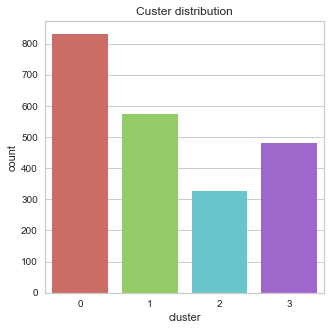

In [240]:
pal = sns.color_palette("hls")
fig,ax=plt.subplots(figsize=(5,5))
pl = sns.countplot(x=X["cluster"], palette="hls")
pl.set_title("Custer distribution")
plt.show()

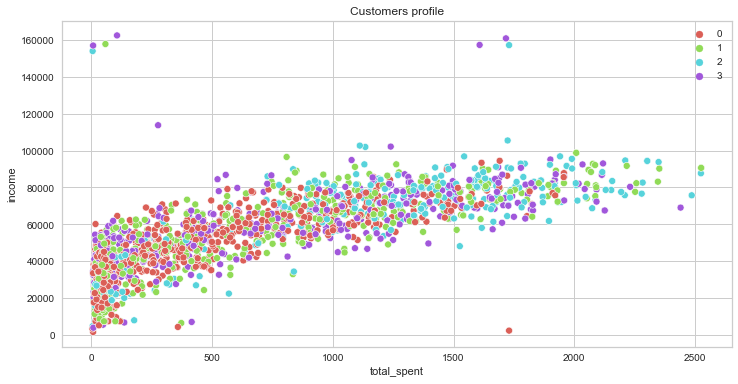

In [241]:
pal = sns.color_palette("hls", 4)

pl = sns.scatterplot(x=X["total_spent"], y=X["income"],hue=X["cluster"],palette= pal)
pl.set_title("Customers profile")
plt.legend()
plt.show()

We can see that cluster 1 followed by cluster 4 are the bigest. <br> The 49.90% of our customers belongs to cluster 1 and 4. 

Income vs spending plot shows the clusters pattern <br>

cluster 0: low spent(<1200)  & low income <br>
cluster 1: low spent (<1200) & low income.(one of the biguest clusters) <br>
cluster 2: high spent (between 1500 and 2500) & high income <br>
cluster 3: high spent (between 1500 and 2500) & high income <br>
cluster 4: low spent(<1200)  & low income. (one of the biguest clusters)<br>
cluster 5: low spent (<1200) & low income  <br>


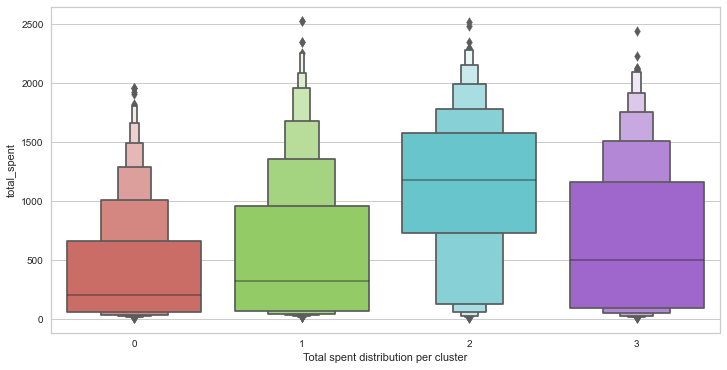

In [242]:
plt.figure()
#pl=sns.swarmplot(x=X["cluster"], y=X["total_spent"], color= "#CBEDDD", alpha=0.5 )
pl=sns.boxenplot(x=X["cluster"], y=X["total_spent"], palette=pal)
#pl = sns.boxplot(x=X["cluster"], y=X["total_spent"], palette=pal)
pl.set_xlabel("Total spent distribution per cluster")
plt.show()

We can see that customers from custler 3 spent the most. Followed by customer from cluster 2 <br>
Customers from clusters 0,1 and 4 do not spend to much. 


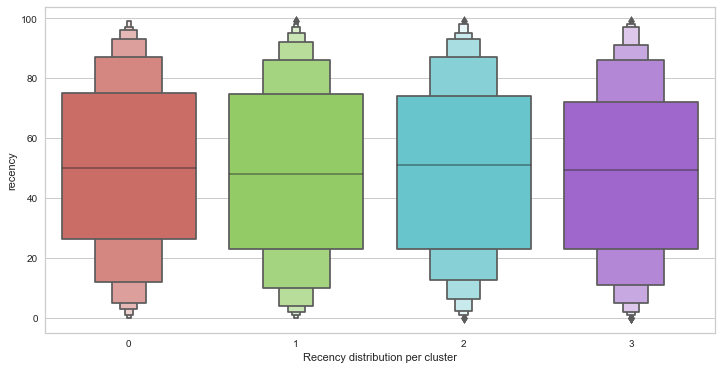

In [243]:
plt.figure()
#pl=sns.swarmplot(x=X["cluster"], y=X["recency"], color= "#CBEDDD", alpha=0.5 )
pl=sns.boxenplot(x=X["cluster"], y=X["recency"], palette=pal)
#pl = sns.boxplot(x=X["cluster"], y=X["recency"], palette=pal)
pl.set_xlabel("Recency distribution per cluster")
plt.show()

For recency the smallets the value the better for the store <br>
We can see that customers from cluster 3 has the smallest value. <br>
however customer from cluster 2 has the highest one for recency. <br>
This mean, customers from cluster 2 do not come very often to the store

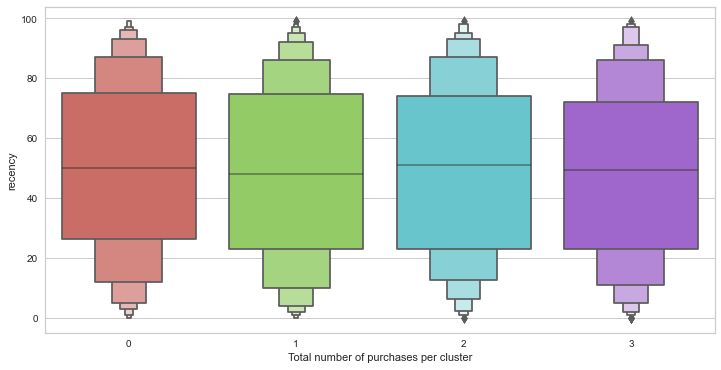

In [244]:
plt.figure()
#pl=sns.swarmplot(x=X["cluster"], y=X["recency"], color= "#CBEDDD", alpha=0.5 )
pl=sns.boxenplot(x=X["cluster"], y=X["recency"], palette=pal)
#pl = sns.boxplot(x=X["cluster"], y=X["total_number_purchase"], palette=pal)
pl.set_xlabel("Total number of purchases per cluster")
plt.show()

We can see that customer from cluster 2 made the highest number of purchases.

 

What we know so far: <br>
cluster 0: low income, low spent, average recency,average number of purchases. <br>
cluster 1: low income,low spent (<1200),average recency, average number of purchases.<br>
cluster 2: high income (<1000), high spent,highest recency (Bad for store),highest number of purchases<br>
cluster 3: high income (<1000), high spent, average recency,average number of purchases. <br>
cluster 4: low income, low spent,average recency,average number of purchases. <br>
cluster 5: low income,low spend (<1200),average recency,  average number of purchases. <br>
    

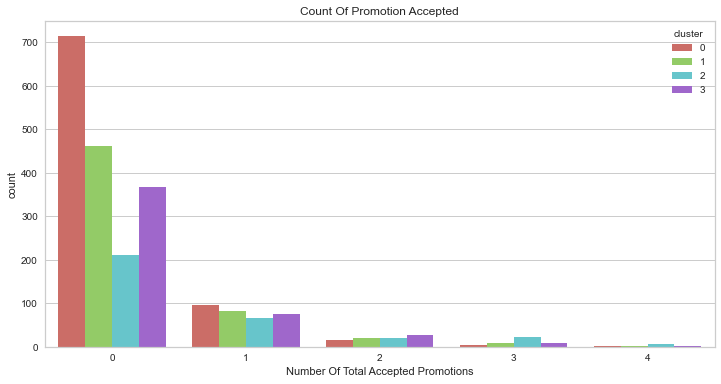

In [245]:

#Plotting count of total campaign accepted.
plt.figure()
pl = sns.countplot(x=df["total_promos"],hue=X["cluster"], palette= pal)
pl.set_title("Count Of Promotion Accepted")
pl.set_xlabel("Number Of Total Accepted Promotions")
plt.show()

promotions are not effective.<br> 
The initial promotion was very effective,specially with cst of cluster 1 and 4.<br>
Customer from cluster 2 rected less to the first promotion. <br>
In the first promotion we can see that customer with average income reacted better to the first promotion. <br>
However, The rest of promotions were less and less effective until promotion number 5, where almost no one participated. <br>

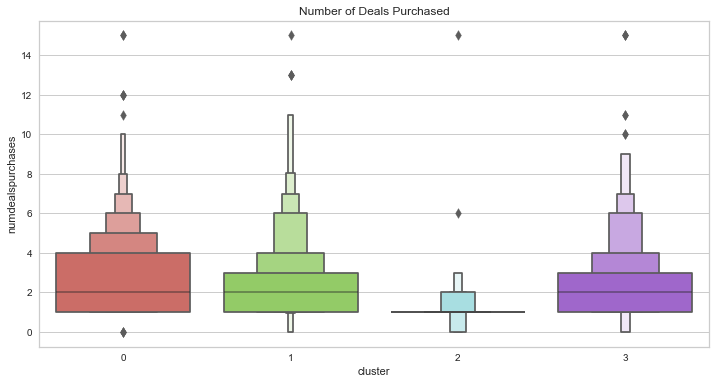

In [267]:
plt.figure()
pl=sns.boxenplot(y=X["numdealspurchases"],x=X["cluster"], palette= pal)
#pl = sns.boxplot(x=X["cluster"], y=X["numdealspurchases"], palette=pal)
pl.set_title("Number of Deals Purchased")
plt.show()

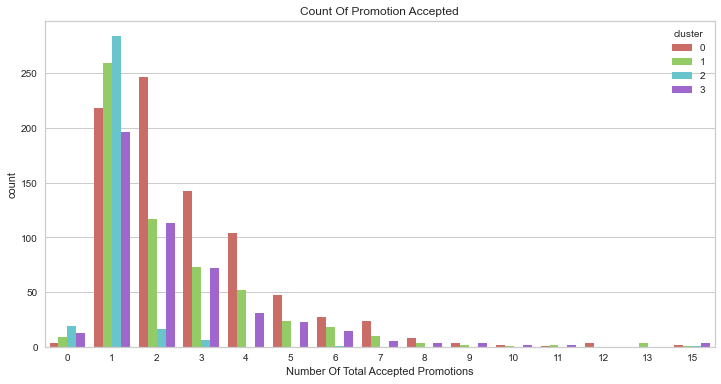

In [268]:
#Plotting count of total campaign accepted.
plt.figure()
pl = sns.countplot(x=df["numdealspurchases"],hue=X["cluster"], palette= pal)
pl.set_title("Count Of Promotion Accepted")
pl.set_xlabel("Number Of Total Accepted Promotions")
plt.show()

although promotions are not working wery well, customers have a positive reaction to deals. <br>
customer from cluster 0,4 react positively to deals <br>
However customer from cluster 2 and 3, the one with highest income, do not react to deals

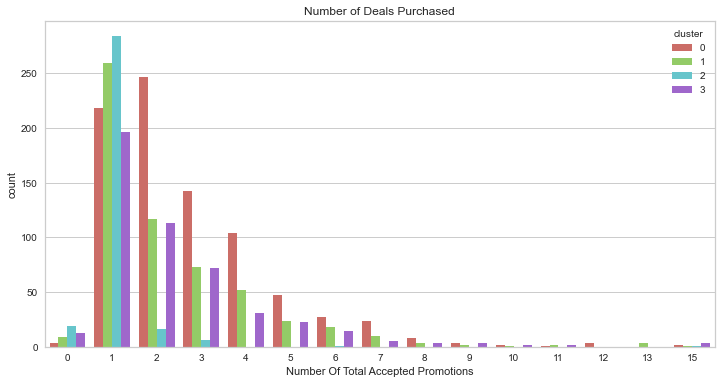

In [247]:
plt.figure()
pl = sns.countplot(x=df["numdealspurchases"],hue=X["cluster"], palette= pal)
pl.set_title("Number of Deals Purchased")
pl.set_xlabel("Number Of Total Accepted Promotions")
plt.show()

In [248]:
X.columns

Index(['income', 'recency', 'mntwines', 'mntfruits', 'mntmeatproducts',
       'mntfishproducts', 'mntsweetproducts', 'mntgoldprods',
       'numdealspurchases', 'numwebpurchases', 'numcatalogpurchases',
       'numstorepurchases', 'numwebvisitsmonth', 'total_spent', 'age',
       'regist_days', 'total_number_purchase', 'number_children', 'parent',
       'total_promos', 'education_graduate', 'education_master',
       'education_postgrad', 'marital_status_single', 'cluster'],
      dtype='object')

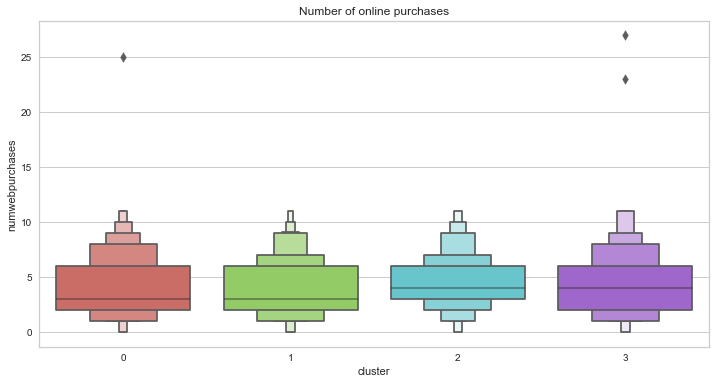

In [249]:
plt.figure()
pl=sns.boxenplot(y=X["numwebpurchases"],x=X["cluster"], palette= pal)
#pl = sns.boxplot(x=X["cluster"], y=X["numwebpurchases"], palette=pal)
pl.set_title("Number of online purchases")
plt.show()

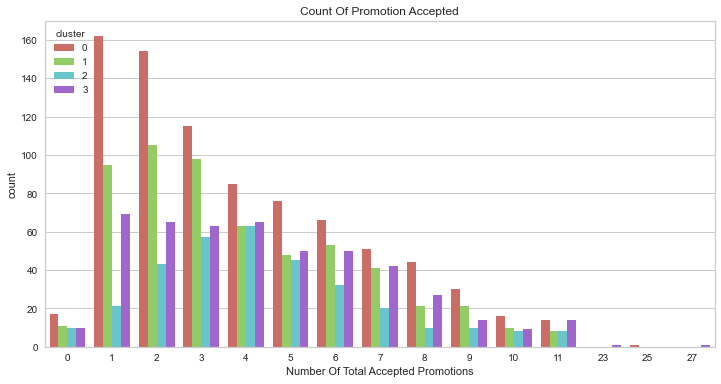

In [261]:
plt.figure()
pl = sns.countplot(x=df["numwebpurchases"],hue=X["cluster"], palette= pal)
pl.set_title("Count Of Promotion Accepted")
pl.set_xlabel("Number Of Total Accepted Promotions")
plt.show()

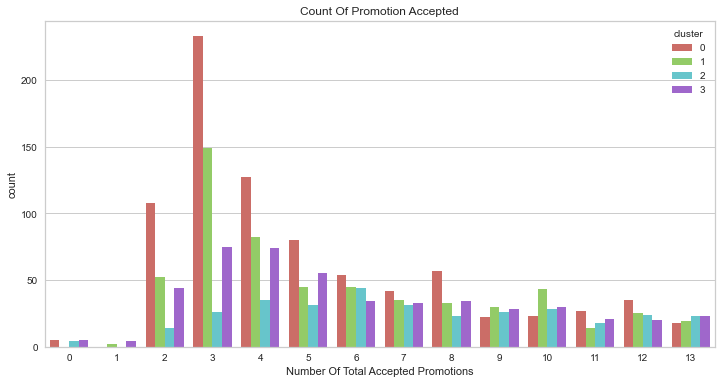

In [262]:
plt.figure()
pl = sns.countplot(x=df["numstorepurchases"],hue=X["cluster"], palette= pal)
pl.set_title("Count Of Promotion Accepted")
pl.set_xlabel("Number Of Total Accepted Promotions")
plt.show()

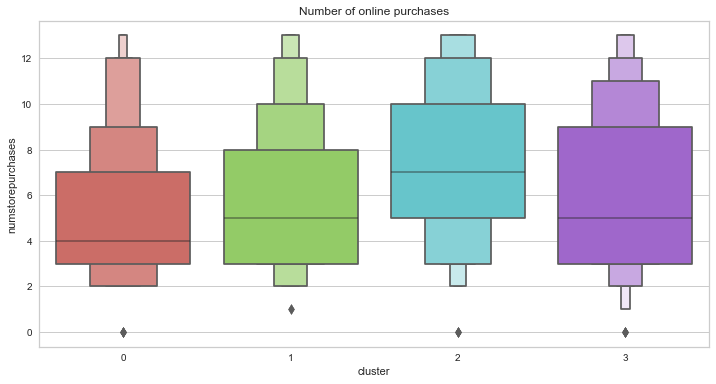

In [265]:
plt.figure()
pl=sns.boxenplot(y=X["numstorepurchases"],x=X["cluster"], palette= pal)
#pl = sns.boxplot(x=X["cluster"], y=X["numwebpurchases"], palette=pal)
pl.set_title("Number of online purchases")
plt.show()

We can see that customers from clusters 3 and 2 buy more online. <br>
However customer from clusters 0,1 and 4 do not buy only a lot.  

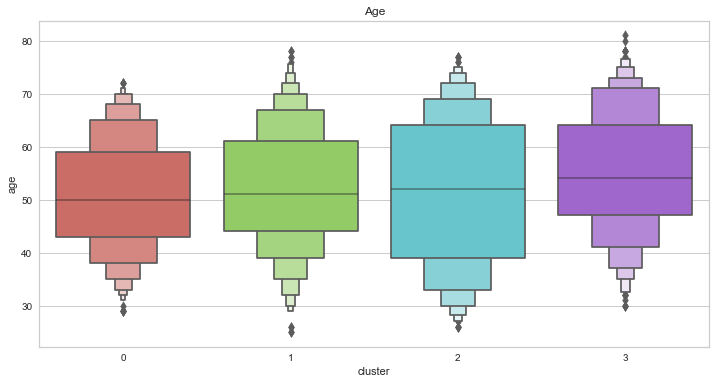

In [250]:
plt.figure()
pl=sns.boxenplot(y=X["age"],x=X["cluster"], palette= pal)
#pl = sns.boxplot(x=X["cluster"], y=X["age"], palette=pal)
pl.set_title("Age")
plt.show()

The customers of all clusters are in the average.around 50-52 years old 

In [251]:
X.columns

Index(['income', 'recency', 'mntwines', 'mntfruits', 'mntmeatproducts',
       'mntfishproducts', 'mntsweetproducts', 'mntgoldprods',
       'numdealspurchases', 'numwebpurchases', 'numcatalogpurchases',
       'numstorepurchases', 'numwebvisitsmonth', 'total_spent', 'age',
       'regist_days', 'total_number_purchase', 'number_children', 'parent',
       'total_promos', 'education_graduate', 'education_master',
       'education_postgrad', 'marital_status_single', 'cluster'],
      dtype='object')

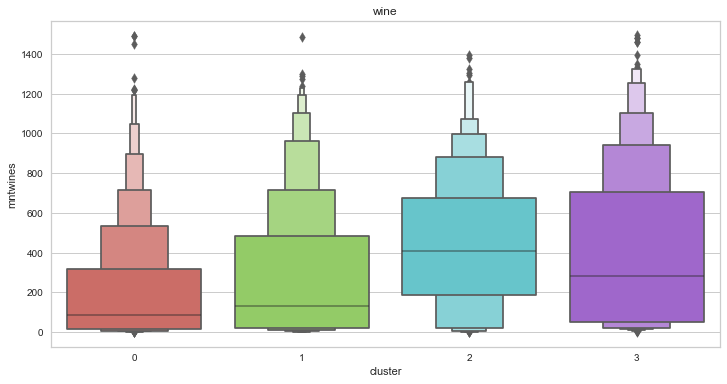

In [252]:
plt.figure()
pl=sns.boxenplot(y=X["mntwines"],x=X["cluster"], palette= pal)
pl.set_title("wine")
plt.show()

Customers from clusters 3 have the highest spent in wine. Followed by customer from cluster 2 <br>
Customers from clusters 0,1,4 have the lowest spent on wine

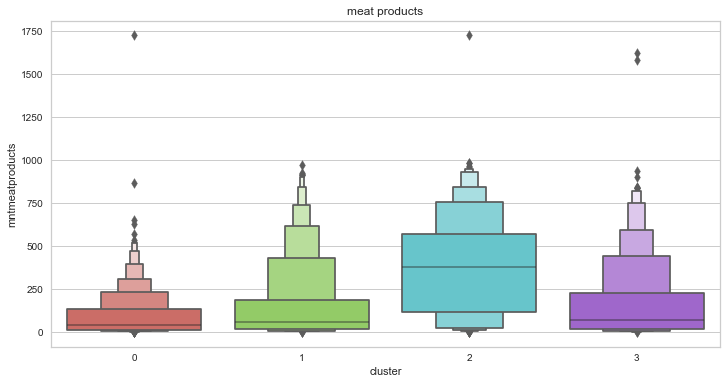

In [253]:
plt.figure()
pl=sns.boxenplot(y=X["mntmeatproducts"],x=X["cluster"], palette= pal)
pl.set_title("meat products")
plt.show()

Same pattern 

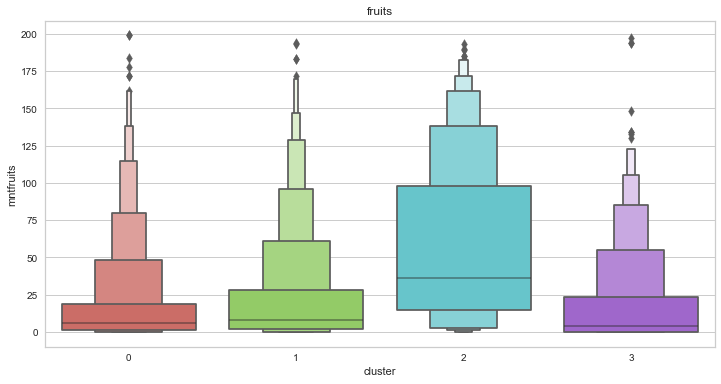

In [254]:
plt.figure()
pl=sns.boxenplot(y=X["mntfruits"],x=X["cluster"], palette= pal)
pl.set_title("fruits")
plt.show()

same pattern

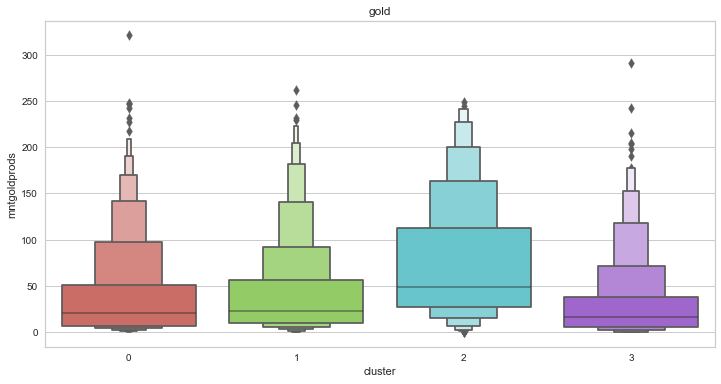

In [255]:
plt.figure()
pl=sns.boxenplot(y=X["mntgoldprods"],x=X["cluster"], palette= pal)
pl.set_title("gold")
plt.show()

same pattern

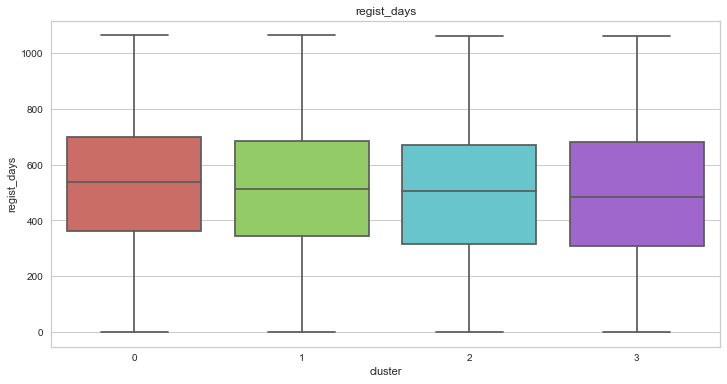

In [256]:
plt.figure()
#pl=sns.boxenplot(y=X["parent"],x=X["cluster"], palette= pal)
pl = sns.boxplot(x=X["cluster"], y=X["regist_days"], palette=pal)
pl.set_title("regist_days")
plt.show()

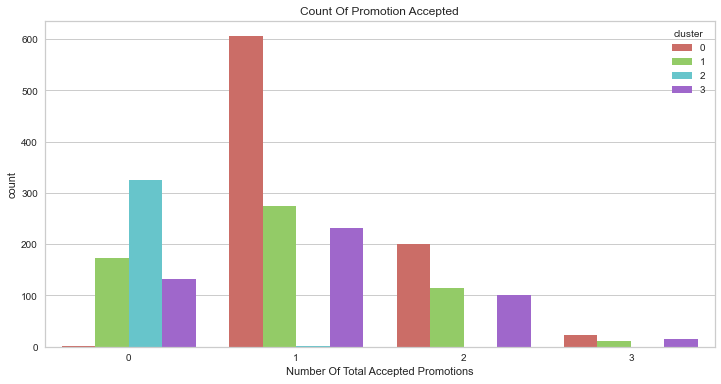

In [257]:
plt.figure()
pl = sns.countplot(x=df["number_children"],hue=X["cluster"], palette= pal)
pl.set_title("Count Of Promotion Accepted")
pl.set_xlabel("Number Of Total Accepted Promotions")
plt.show()

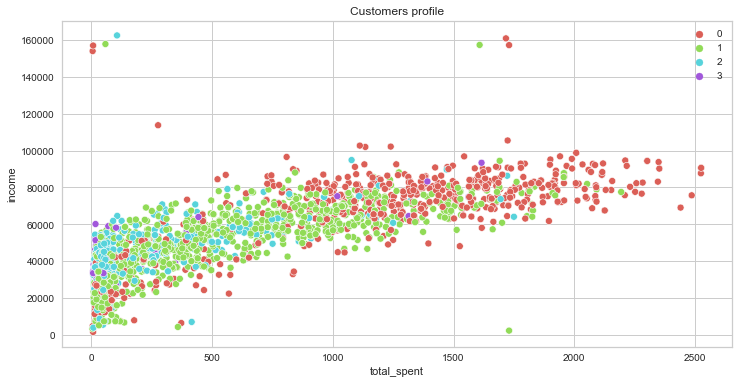

In [259]:
pal = sns.color_palette("hls", 4)

pl = sns.scatterplot(x=X["total_spent"], y=X["income"],hue=X["number_children"],palette= pal)
pl.set_title("Customers profile")
plt.legend()
plt.show()

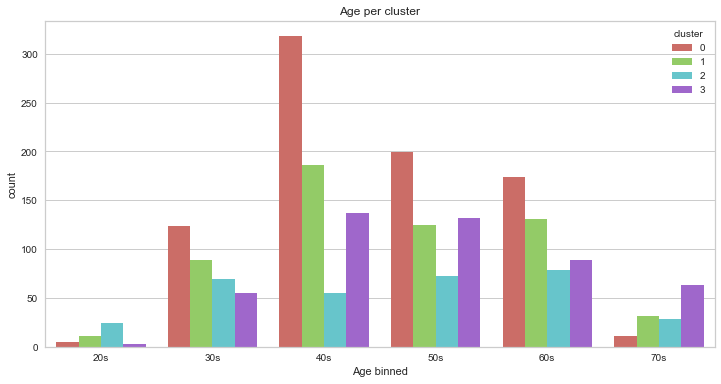

In [260]:
bins= [20,30,40,50,60,70,80]
labels=["20s","30s","40s","50s","60s","70s"]

df["age"]= pd.cut(df["age"],bins,labels=labels)
plt.figure()
pl = sns.countplot(x=df["age"],hue=X["cluster"], palette= pal)
pl.set_title("Age per cluster")
pl.set_xlabel("Age binned")
plt.show()

In [136]:
X.columns

Index(['income', 'recency', 'mntwines', 'mntfruits', 'mntmeatproducts',
       'mntfishproducts', 'mntsweetproducts', 'mntgoldprods',
       'numdealspurchases', 'numwebpurchases', 'numcatalogpurchases',
       'numstorepurchases', 'numwebvisitsmonth', 'total_spent', 'age',
       'regist_days', 'total_number_purchase', 'number_children', 'parent',
       'total_promos', 'education_graduate', 'education_master',
       'education_postgrad', 'marital_status_single', 'cluster'],
      dtype='object')